## Create plots showing demographics on Diaper Need in Middle TN counties and the way that NDC in addressing need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#import NDC deliveries csv
county_stats = pd.read_csv('../files/county_stats.csv')
county_stats.head()

,County,Total Population,Population Age 0-4,Population Age 5-9,Population Age 0-9,# Households,# Live Births,Est # in Diapers,Est. TennCare,Household Income (Avg),% Title 1 Schools,% Food Stamp,% Poverty Rate 0-17,% Poverty Rate All Ages,Pop in Poverty <17,Pop in Poverty Tot,In Diapers in Poverty,diapers used,Diaper cost/month,$ per county/month for low income
0,Davidson,"667,885","46,539","41,537","88,076","269,078","9,962","24,905","12,453","$60,388",63.42%,14.60%,25.40%,15.40%,169643,102854,6325.870,1518208.80,$80.00,"$442,810.90"
1,Williamson,"205,645","12,451","16,755","29,206","71,043","2,321","5,803","2,901","$112,962",17.74%,3.40%,3.50%,3.80%,7198,7815,203.105,48745.20,$80.00,"$14,217.35"
2,Montgomery,"189,709","16,476","14,404","30,880","67,090","3,512","8,780","4,390","$57,541",61.70%,13.20%,16.60%,12.00%,31492,22765,1457.480,349795.20,$80.00,"$102,023.60"
3,Maury,"85,767","5,730","6,077","11,807","32,889","1,184","2,960","1,480","$57,170",64.20%,16.40%,15.20%,10.80%,13037,9263,449.920,107980.80,$80.00,"$31,494.40"
4,Hickman,"24,251","1,291","1,553","2,844","8,855",257,643,321,"$43,596",88.89%,22.70%,24.20%,16.30%,5869,3953,155.606,37345.44,$80.00,"$10,892.42"


In [3]:
#only keep needed columns
county_stats = county_stats[['County',
                             'Population Age 0-4',
                             'Est # in Diapers',
                             'Est. TennCare',
                             'In Diapers in Poverty',
                             'diapers used'
                            ]].copy()
county_stats.head()

,County,Population Age 0-4,Est # in Diapers,Est. TennCare,In Diapers in Poverty,diapers used
0,Davidson,"46,539","24,905","12,453",6325.870,1518208.80
1,Williamson,"12,451","5,803","2,901",203.105,48745.20
2,Montgomery,"16,476","8,780","4,390",1457.480,349795.20
3,Maury,"5,730","2,960","1,480",449.920,107980.80
4,Hickman,"1,291",643,321,155.606,37345.44


In [4]:
#rename columns
county_stats = county_stats.rename(columns = {'County':'county',
                                              'Population Age 0-4':'pop_under_4',
                                              'Est # in Diapers':'est_in_diapers',
                                              'Est. TennCare':'est_in_tenncare',
                                              'In Diapers in Poverty':'diapers_and_poverty',
                                              'diapers used':'diapers_used'
                                             })
county_stats.columns

Index(['county', 'pop_under_4', 'est_in_diapers', 'est_in_tenncare',
       'diapers_and_poverty', 'diapers_used'],
      dtype='object')

In [5]:
#import NDC deliveries csv
total_by_county = pd.read_csv('../files/total_by_county.csv')
total_by_county.head()

,County,Total
0,"Davidson, TN",1817313
1,"Marshall, TN",2025
2,"Maury, TN",1475
3,"Washington, TN",3750
4,"Williamson, TN",6050


In [6]:
#strip TN from counties and rename
total_by_county['County'] = total_by_county['County'].str.strip(', TN')
total_by_county = total_by_county.rename(columns = {'County':'county',
                                              'Total':'total'
                                             })
total_by_county

,county,total
0,Davidson,1817313
1,Marshall,2025
2,Maury,1475
3,Washington,3750
4,Williamson,6050
5,Wilson,10550
6,otal,1841163


In [7]:
#convert total column from year to month
total_by_county['total']=total_by_county['total']/12
total_by_county

,county,total
0,Davidson,151442.750000
1,Marshall,168.750000
2,Maury,122.916667
3,Washington,312.500000
4,Williamson,504.166667
5,Wilson,879.166667
6,otal,153430.250000


### First Plot - 'Diaper Need in Middle TN by County'

In [8]:
#merge datasets
diapers_by_county = pd.merge(county_stats, total_by_county, on = 'county', how = 'inner')
diapers_by_county

,county,pop_under_4,est_in_diapers,est_in_tenncare,diapers_and_poverty,diapers_used,total
0,Davidson,"46,539","24,905","12,453",6325.8700,1518208.8,151442.750000
1,Williamson,"12,451","5,803","2,901",203.1050,48745.2,504.166667
2,Maury,"5,730","2,960","1,480",449.9200,107980.8,122.916667
3,Marshall,"1,775","1,025",513,203.9750,48954.0,168.750000
4,Wilson,"7,549","4,128",2064,408.6225,98069.4,879.166667


In [9]:
#replace null values with zero
diapers_by_county['total'] = diapers_by_county['total'].fillna(0)
diapers_by_county

,county,pop_under_4,est_in_diapers,est_in_tenncare,diapers_and_poverty,diapers_used,total
0,Davidson,"46,539","24,905","12,453",6325.8700,1518208.8,151442.750000
1,Williamson,"12,451","5,803","2,901",203.1050,48745.2,504.166667
2,Maury,"5,730","2,960","1,480",449.9200,107980.8,122.916667
3,Marshall,"1,775","1,025",513,203.9750,48954.0,168.750000
4,Wilson,"7,549","4,128",2064,408.6225,98069.4,879.166667


In [10]:
diapers_by_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   county               5 non-null      object 
 1   pop_under_4          5 non-null      object 
 2   est_in_diapers       5 non-null      object 
 3   est_in_tenncare      5 non-null      object 
 4   diapers_and_poverty  5 non-null      float64
 5   diapers_used         5 non-null      float64
 6   total                5 non-null      float64
dtypes: float64(3), object(4)
memory usage: 320.0+ bytes


In [11]:
#convert to integers
diapers_by_county['diapers_and_poverty'] = diapers_by_county['diapers_and_poverty'].astype(int)
diapers_by_county['diapers_used'] = diapers_by_county['diapers_used'].astype(int)
diapers_by_county['total'] = diapers_by_county['total'].astype(int)

In [12]:
#add 'diaper_need' column
diapers_by_county['diapers_need'] = diapers_by_county['diapers_used']-diapers_by_county['total']
diapers_by_county

,county,pop_under_4,est_in_diapers,est_in_tenncare,diapers_and_poverty,diapers_used,total,diapers_need
0,Davidson,"46,539","24,905","12,453",6325,1518208,151442,1366766
1,Williamson,"12,451","5,803","2,901",203,48745,504,48241
2,Maury,"5,730","2,960","1,480",449,107980,122,107858
3,Marshall,"1,775","1,025",513,203,48954,168,48786
4,Wilson,"7,549","4,128",2064,408,98069,879,97190


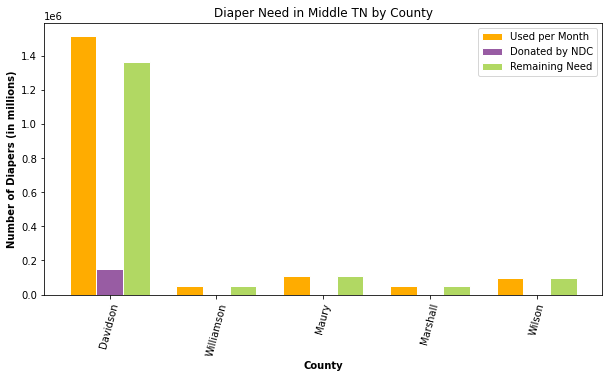

In [13]:
plt.figure(figsize=(10,5))

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = diapers_by_county['diapers_used']
bars2 = diapers_by_county['total']
bars3 = diapers_by_county['diapers_need']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#ffac00', width=barWidth, edgecolor='white', label='Used per Month')
plt.bar(r2, bars2, color='#985ca3', width=barWidth, edgecolor='white', label='Donated by NDC')
plt.bar(r3, bars3, color='#b1d863', width=barWidth, edgecolor='white', label='Remaining Need')
 
# Add xticks on the middle of the group bars
plt.xlabel('County', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], diapers_by_county['county'], rotation=75)

plt.ylabel('Number of Diapers (in millions)', fontweight='bold')

plt.title('Diaper Need in Middle TN by County')
 
# Create legend & Show graphic
plt.legend()

plt.savefig('../files/diapers_by_county.png',bbox_inches='tight', dpi=300)

plt.show()

### Second Plot - 'Infants in Poverty in Middle TN by County'

In [14]:
#merge datasets
poverty_by_county = pd.merge(county_stats, total_by_county, on = 'county', how = 'outer')
poverty_by_county

,county,pop_under_4,est_in_diapers,est_in_tenncare,diapers_and_poverty,diapers_used,total
0,Davidson,"46,539","24,905","12,453",6325.8700,1518208.80,151442.750000
1,Williamson,"12,451","5,803","2,901",203.1050,48745.20,504.166667
2,Montgomery,"16,476","8,780","4,390",1457.4800,349795.20,NaN
3,Maury,"5,730","2,960","1,480",449.9200,107980.80,122.916667
4,Hickman,"1,291",643,321,155.6060,37345.44,NaN
5,Marshall,"1,775","1,025",513,203.9750,48954.00,168.750000
6,Putnam,"4,298","2,175","1,088",406.7250,97614.00,NaN
7,Rutherford,"19,515","10,365","5,183",1285.2600,308462.40,NaN
8,Cheatham,"2,237","1,125",563,151.8750,36450.00,NaN
9,Wilson,"7,549","4,128",2064,408.6225,98069.40,879.166667


In [15]:
#drop unneeded columns
poverty_by_county = poverty_by_county.drop(columns=['diapers_and_poverty','diapers_used','total'])
poverty_by_county

,county,pop_under_4,est_in_diapers,est_in_tenncare
0,Davidson,"46,539","24,905","12,453"
1,Williamson,"12,451","5,803","2,901"
2,Montgomery,"16,476","8,780","4,390"
3,Maury,"5,730","2,960","1,480"
4,Hickman,"1,291",643,321
5,Marshall,"1,775","1,025",513
6,Putnam,"4,298","2,175","1,088"
7,Rutherford,"19,515","10,365","5,183"
8,Cheatham,"2,237","1,125",563
9,Wilson,"7,549","4,128",2064


In [16]:
#delete last 2 rows
poverty_by_county = poverty_by_county.drop(poverty_by_county.index[[10,11,12]])
poverty_by_county

,county,pop_under_4,est_in_diapers,est_in_tenncare
0,Davidson,"46,539","24,905","12,453"
1,Williamson,"12,451","5,803","2,901"
2,Montgomery,"16,476","8,780","4,390"
3,Maury,"5,730","2,960","1,480"
4,Hickman,"1,291",643,321
5,Marshall,"1,775","1,025",513
6,Putnam,"4,298","2,175","1,088"
7,Rutherford,"19,515","10,365","5,183"
8,Cheatham,"2,237","1,125",563
9,Wilson,"7,549","4,128",2064


In [17]:
poverty_by_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   county           10 non-null     object
 1   pop_under_4      10 non-null     object
 2   est_in_diapers   10 non-null     object
 3   est_in_tenncare  10 non-null     object
dtypes: object(4)
memory usage: 400.0+ bytes


In [18]:
#remove comma and convert to integers
poverty_by_county['pop_under_4'] = poverty_by_county['pop_under_4'].replace(',','', regex=True).astype(int)
poverty_by_county['est_in_diapers'] = poverty_by_county['est_in_diapers'].replace(',','', regex=True).astype(int)
poverty_by_county['est_in_tenncare'] = poverty_by_county['est_in_tenncare'].replace(',','', regex=True).astype(int)

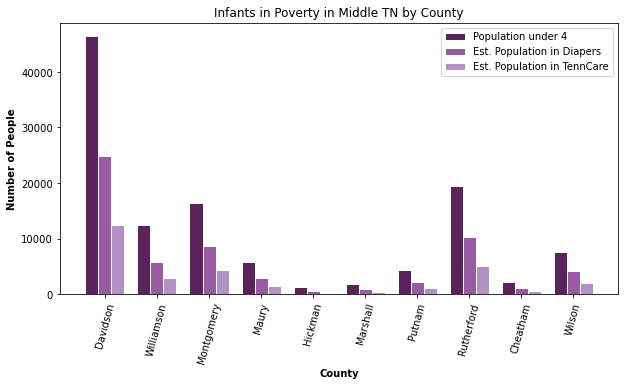

In [22]:
plt.figure(figsize=(10,5))

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = poverty_by_county['pop_under_4']
bars2 = poverty_by_county['est_in_diapers']
bars3 = poverty_by_county['est_in_tenncare']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
## 
# Make the plot
plt.bar(r1, bars1, color='#5b235c', width=barWidth, edgecolor='white', label='Population under 4')
plt.bar(r2, bars2, color='#985ca3', width=barWidth, edgecolor='white', label='Est. Population in Diapers')
plt.bar(r3, bars3, color='#b193c3', width=barWidth, edgecolor='white', label='Est. Population in TennCare')
 
# Add xticks on the middle of the group bars
plt.xlabel('County', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], poverty_by_county['county'], rotation=75)

plt.ylabel('Number of People', fontweight='bold')

plt.title('Infants in Poverty in Middle TN by County')
 
# Create legend & Show graphic
plt.legend()

plt.savefig('../files/poverty_by_county.png',bbox_inches='tight', dpi=300)

plt.show()